In [1]:
import xlrd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import librosa

# Load xlsx

In [5]:
file_name = 'data9_'+str(data_set_number)+'.xlsx'
print("{} is loaded".format(file_name))
workbook = xlrd.open_workbook(file_name)

data9_9.xlsx is loaded


# Onset-time information

In [ ]:
onset_times = [[200],[312],[624],[762],[752],[772],[884],[502],[94,258],[836],[650],[636],[576],[656],[638],[706]]
sampling_rate=200
data_set_number = 9
onset_time = onset_times[data_set_number-1]

# Load the data

In [6]:
worksheet = workbook.sheet_by_index(0)
nrows = worksheet.nrows
row_val = []
for row_num in range(nrows):
    row_val.append(worksheet.row_values(row_num)) 
row_val = np.asarray(row_val)
row_val = np.transpose(row_val)
number_of_channels = row_val.shape[0]
number_of_data = row_val.shape[1]
print(row_val.shape)

(30, 216000)


# Interested Channels

In [7]:
channels=['Fp1','F3','C3','P3','F7', 'T7',  'P7', 'O1', 'F9', 'FT9', 'T9', 'P9', 'FP2','F4', 'C4','P4','F8','T8','P8','O2', 'F10','Ft10','T10','P10','FZ','CZ','OZ','Sp1', 'Sp2', 'EKG']         
print(len(channels))
channel_dict={}
for i in range(len(channels)):
    channel_dict[channels[i]]=i

30


In [8]:
Selected_electrod=['Sp1', 'Sp2', 'T8', 'P8']
for i in range(len(Selected_electrod)):
    print(channel_dict[Selected_electrod[i]])

27
28
17
18


# Hidden layer

In [9]:
data_size = 100
hidden_layer = 30
prediction_range = 4

# Initialize input data

In [62]:
def normalize(array):
    temp = np.zeros(len(array))
    min = np.min(array)
    max = np.max(array)
    for i in range(len(array)):
        temp[i]=(array[i]-min)/(max-min)
    return temp
def downsampling(array, downgrade):
    length = int(len(array)/downgrade)
    temp = np.zeros(length)
    for i in range(length):
        temp[i]=np.max(array[downgrade*i:downgrade*(i+1)])
    return temp
downgrade_rate = 100

# Initialize input and output data

In [117]:
input_data = []
total_data_number = 0
unit_length = 0
for k in range(5):
    temp_array = downsampling(normalize(row_val[k]),downgrade_rate)
    unit_length = len(temp_array)-data_size+1
    total_data_number += unit_length
    for i in range(unit_length):
        input_data.append(temp_array[i:i+data_size])
input_data = np.array(input_data)

output_data = np.zeros((total_data_number,1))

for i in range(len(onset_time)):
    for j in range(int(data_size)):
        index = int(onset_time[i]*sampling_rate/downgrade_rate -2*data_size + j) #for prediction
        for k in range(5):
            output_data[k*unit_length+index][0] = 1

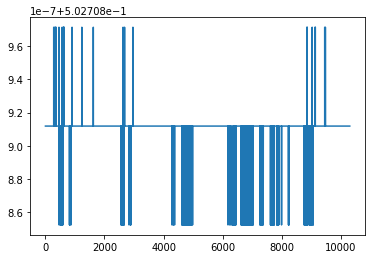

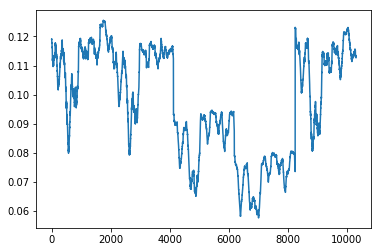

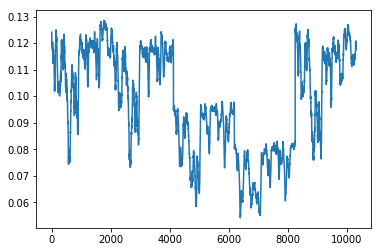

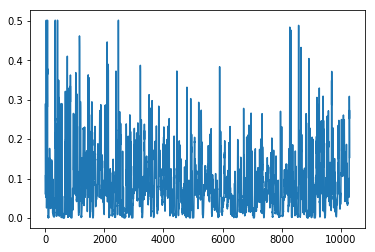

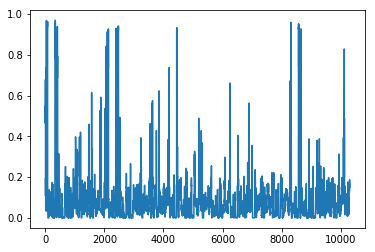

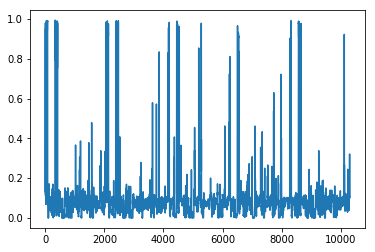

In [110]:
sess = tf.InteractiveSession()
x = tf.placeholder(tf.float32, shape=[None, data_size])
y = tf.placeholder(tf.float32, shape=[None,1])

W_fc1 = tf.Variable(tf.truncated_normal([data_size, 50], stddev=0.01))
b_fc1 = tf.Variable(tf.constant(0.01, shape=[50]))
h_fc1 = tf.nn.relu(tf.matmul(x, W_fc1) + b_fc1)

W_fc2 = tf.Variable(tf.truncated_normal([50, 50], stddev=0.01))
b_fc2 = tf.Variable(tf.constant(0.01, shape=[50]))
h_fc2 = tf.nn.relu(tf.matmul(h_fc1, W_fc2) + b_fc2)

W_fc3 = tf.Variable(tf.truncated_normal([50, 50], stddev=0.01))
b_fc3 = tf.Variable(tf.constant(0.01, shape=[50]))
h_fc3 = tf.nn.relu(tf.matmul(h_fc2, W_fc3) + b_fc3)

W_fc4 = tf.Variable(tf.truncated_normal([50, 50], stddev=0.01))
b_fc4 = tf.Variable(tf.constant(0.01, shape=[50]))
h_fc4 = tf.nn.relu(tf.matmul(h_fc3, W_fc4) + b_fc4)

W_fc5 = tf.Variable(tf.truncated_normal([50, 1], stddev=0.01))
b_fc5 = tf.Variable(tf.constant(0.01, shape=[1]))
y_hat = tf.sigmoid(tf.matmul(h_fc4, W_fc5) + b_fc5)

y_predict = tf.floor(y_hat+0.5)

cross_entropy = tf.reduce_mean((y-y_hat)*(y-y_hat))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess.run(tf.global_variables_initializer())

for i in range(10001):
    train_step.run(feed_dict={x : input_data, y : output_data})
    if i%2000 == 0:
        temp = y_hat.eval({x:input_data, y : output_data})
        plt.plot(temp)
        plt.show()

# Further training

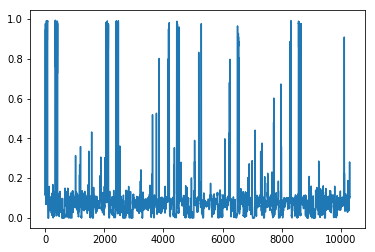

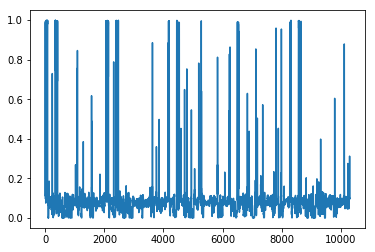

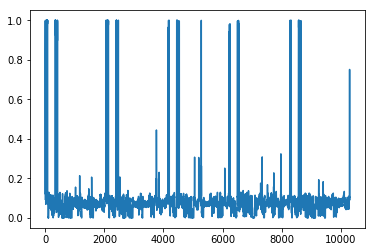

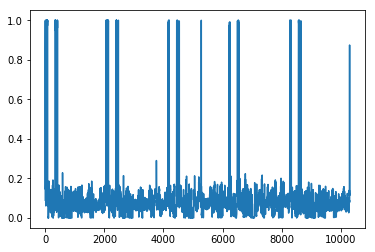

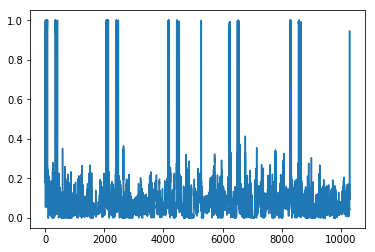

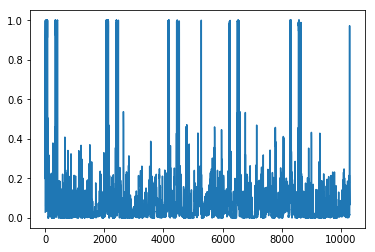

In [111]:
for i in range(10001):
    train_step.run(feed_dict={x : input_data, y : output_data})
    if i%2000 == 0:
        temp = y_hat.eval({x:input_data, y : output_data})
        plt.plot(temp)
        plt.show()

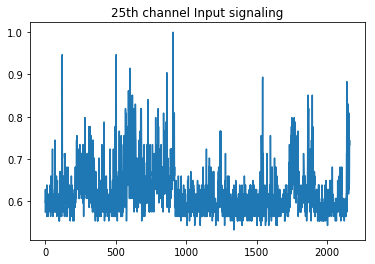

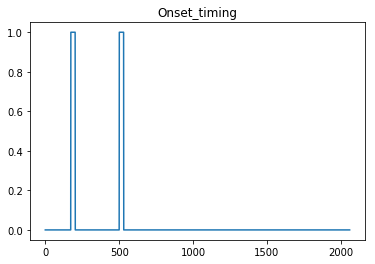

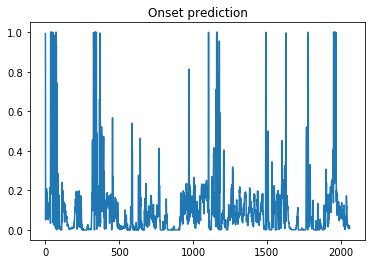

In [118]:
Test_channel=25
temp_array = downsampling(normalize(row_val[Test_channel]),downgrade_rate)
total_data_number = len(temp_array) - data_size + 1
input_data = []
for i in range(total_data_number):
    input_data.append(temp_array[i:i+data_size])
input_data = np.array(input_data)
plt.title('{}th channel Input signaling'.format(Test_channel))
plt.plot(temp_array)
plt.show()
output_data = np.zeros((total_data_number,1))
for i in range(len(onset_time)):
    for j in range(30):
        index = int(onset_time[i]*sampling_rate/downgrade_rate - 15 + j)
        output_data[index][0] = 1
plt.title('Onset_timing')
plt.plot(output_data)
plt.show()
temp = y_hat.eval({x:input_data})
plt.title('Onset prediction')
plt.plot(temp)
plt.show()

In [124]:
validation_data_set=1;
file_name2 = 'data9_'+str(validation_data_set)+'.xlsx'
print("{} is loaded".format(file_name2))
workbook2 = xlrd.open_workbook(file_name2)
worksheet2 = workbook2.sheet_by_index(0)
nrows2 = worksheet2.nrows

data9_1.xlsx is loaded


In [125]:
row_val_val = []
for row_num in range(nrows2):
    row_val_val.append(worksheet2.row_values(row_num)) 
row_val_val = np.asarray(row_val_val)
row_val_val = np.transpose(row_val_val)
number_of_channels_val = row_val_val.shape[0]
number_of_data_val = row_val_val.shape[1]

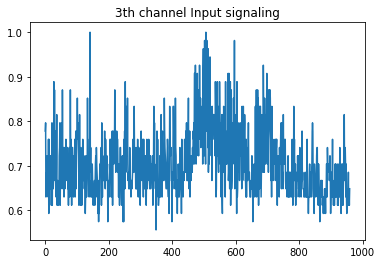

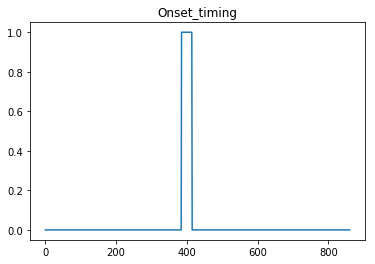

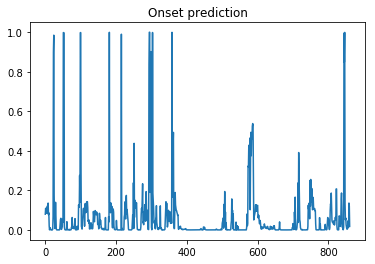

In [128]:
onset_time_val = onset_times[validation_data_set-1]
Val_channel=3
temp_array = downsampling(normalize(row_val_val[Val_channel]),downgrade_rate)
total_data_number_val = len(temp_array) - data_size + 1
input_data = []
for i in range(total_data_number_val):
    input_data.append(temp_array[i:i+data_size])
input_data = np.array(input_data)
plt.title('{}th channel Input signaling'.format(Val_channel))
plt.plot(temp_array)
plt.show()
output_data = np.zeros((total_data_number_val,1))
for i in range(len(onset_time_val)):
    for j in range(30):
        index = int(onset_time_val[i]*sampling_rate/downgrade_rate - 15 + j)
        output_data[index][0] = 1
plt.title('Onset_timing')
plt.plot(output_data)
plt.show()
temp = y_hat.eval({x:input_data})
plt.title('Onset prediction')
plt.plot(temp)
plt.show()